### Installing required libraries

In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd

## Read and load the data

We will be loading a dataset on stock prices using daily Open, High, Low, and Close values.

In [ ]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/g5XM0-gTrOquyZcBxcJAfw/StockData.csv")
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,2018-03-27,173.68,175.15,166.92,168.340
1,2018-03-26,168.07,173.10,166.44,172.770
2,2018-03-23,168.39,169.92,164.94,164.940
3,2018-03-22,170.00,172.68,168.60,168.845
4,2018-03-21,175.04,175.09,171.26,171.270


In [ ]:
from sklearn.preprocessing import MinMaxScaler
price = stock_data[['High','Low','Open','Close']]
print(price[:5])

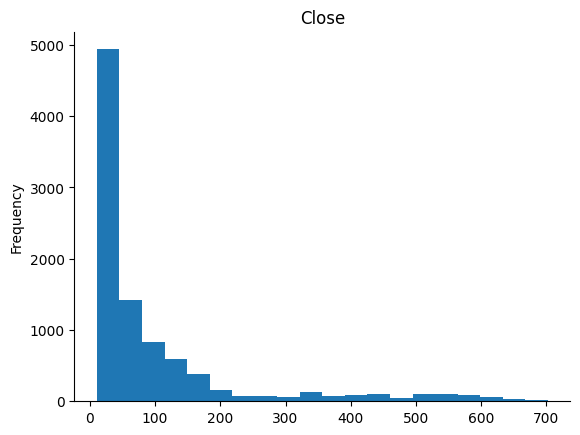

In [ ]:
from matplotlib import pyplot as plt
df['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

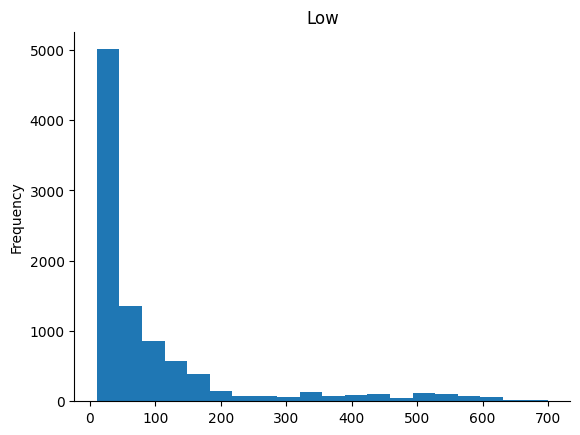

In [ ]:
from matplotlib import pyplot as plt
df['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

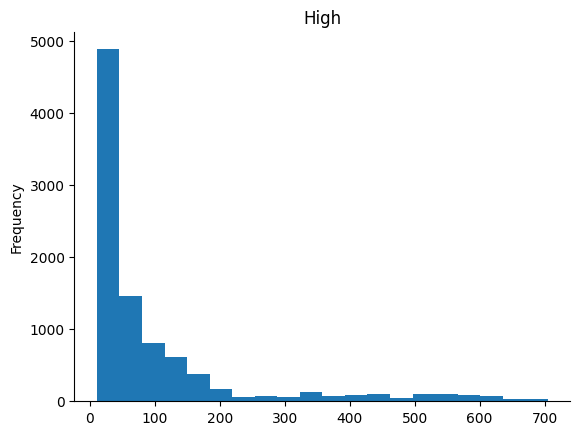

In [ ]:
from matplotlib import pyplot as plt
df['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

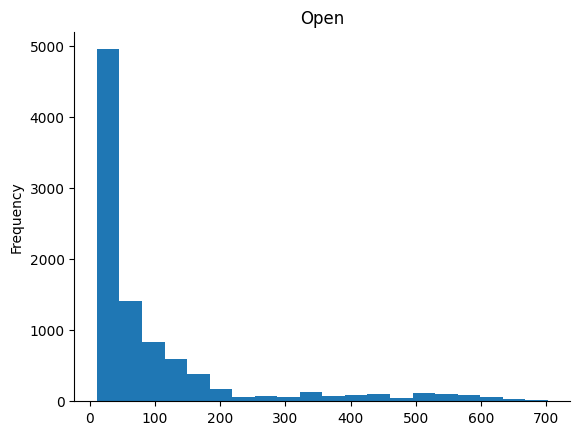

In [ ]:
from matplotlib import pyplot as plt
df['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
stock_data=df
#convert date and column and into Datetime object
stock_data['Date']=pd.to_datetime(stock_data['Date'])
print("Information about dataset",end="\n")
print(stock_data.info())
print("Description about dataset",end="\n")
print(stock_data.describe)

Information about dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9400 entries, 0 to 9399
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9400 non-null   datetime64[ns]
 1   Open    9400 non-null   float64       
 2   High    9400 non-null   float64       
 3   Low     9400 non-null   float64       
 4   Close   9400 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 367.3 KB
None
Description about dataset
<bound method NDFrame.describe of            Date    Open    High     Low    Close
0    2018-03-27  173.68  175.15  166.92  168.340
1    2018-03-26  168.07  173.10  166.44  172.770
2    2018-03-23  168.39  169.92  164.94  164.940
3    2018-03-22  170.00  172.68  168.60  168.845
4    2018-03-21  175.04  175.09  171.26  171.270
...         ...     ...     ...     ...      ...
9395 1980-12-18   26.63   26.75   26.63   26.630
9396 1980-12-17   25.87   26.00   25.87   

In [ ]:
print("First 5 rows of dataset",end="\n")
print(stock_data.head(5))
print("Last 5 rows of dataset",end="\n")
print(stock_data.tail(5))

First 5 rows of dataset
        Date    Open    High     Low    Close
0 2018-03-27  173.68  175.15  166.92  168.340
1 2018-03-26  168.07  173.10  166.44  172.770
2 2018-03-23  168.39  169.92  164.94  164.940
3 2018-03-22  170.00  172.68  168.60  168.845
4 2018-03-21  175.04  175.09  171.26  171.270
Last 5 rows of dataset
           Date   Open   High    Low  Close
9395 1980-12-18  26.63  26.75  26.63  26.63
9396 1980-12-17  25.87  26.00  25.87  25.87
9397 1980-12-16  25.37  25.37  25.25  25.25
9398 1980-12-15  27.38  27.38  27.25  27.25
9399 1980-12-12  28.75  28.87  28.75  28.75


In [ ]:
stock_data=stock_data.sort_values(by='Date')
print(stock_data.head())

           Date   Open   High    Low  Close
9399 1980-12-12  28.75  28.87  28.75  28.75
9398 1980-12-15  27.38  27.38  27.25  27.25
9397 1980-12-16  25.37  25.37  25.25  25.25
9396 1980-12-17  25.87  26.00  25.87  25.87
9395 1980-12-18  26.63  26.75  26.63  26.63


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9400 entries, 9399 to 0
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9400 non-null   datetime64[ns]
 1   Open    9400 non-null   float64       
 2   High    9400 non-null   float64       
 3   Low     9400 non-null   float64       
 4   Close   9400 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 440.6 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler
price = stock_data[['High','Low','Open','Close']]
print(price[:5])

       High    Low   Open  Close
9399  28.87  28.75  28.75  28.75
9398  27.38  27.25  27.38  27.25
9397  25.37  25.25  25.37  25.25
9396  26.00  25.87  25.87  25.87
9395  26.75  26.63  26.63  26.63


In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
price = stock_data[['High','Low','Open','Close']]
price = scaler.fit_transform(price.values)
print(price[:5])

[[-0.94884358 -0.94844388 -0.94899391 -0.94863261]
 [-0.95313783 -0.95280073 -0.95295751 -0.95297352]
 [-0.95893076 -0.95860987 -0.95877273 -0.95876139]
 [-0.95711507 -0.95680904 -0.95732616 -0.95696715]
 [-0.95495353 -0.95460157 -0.95512737 -0.95476776]]


# Create test and training sets¶

In [ ]:
train_window=7
import numpy as np
def create_in_out_sequence(price,tw):
  inout_seq=[]
  L=len(price)
  print("length",L)
  for i in range(L-tw):
    data_seq=price[i:i+tw]
    data_label=price[i+tw:i+tw+1][0][3]
    inout_seq.append((data_seq,data_label))
  data=inout_seq
  print("Size of data :",len(data))
  test_set_size=20
  train_set_size=len(data)-(test_set_size);
  print("size of test :",test_set_size)
  print("size of train :",train_set_size)

  train=data[:train_set_size]
  test=data[train_set_size:]
  train=train[:-(tw-1)]
  return train,test
train,test=create_in_out_sequence(price,train_window)


length 9400
Size of data : 9393
size of test : 20
size of train : 9373


The `create_in_out_sequences` method creates labels for the dataset and isolates the datapoints we are inputting into the model, taking into account the training and test size and returns the training and test sets.


In [ ]:
print(test[0])
print(train[-1])

(array([[-0.52820808, -0.53303223, -0.53350981, -0.53283172],
       [-0.52982203, -0.53404883, -0.53440669, -0.5345102 ],
       [-0.53022552, -0.5352397 , -0.53215004, -0.53676747],
       [-0.53071547, -0.5332065 , -0.53512997, -0.53233975],
       [-0.52581598, -0.52789114, -0.5297198 , -0.52378816],
       [-0.51503711, -0.52013593, -0.52196618, -0.51390537],
       [-0.51189567, -0.51447202, -0.51401004, -0.51558385]]), np.float64(-0.5163652148748373))
(array([[-0.56112112, -0.56992463, -0.56034371, -0.57013457],
       [-0.56803804, -0.58165473, -0.56843004, -0.58234698],
       [-0.57700122, -0.59556763, -0.57774595, -0.58046592],
       [-0.55970891, -0.5744514 , -0.57360876, -0.56096079],
       [-0.55723035, -0.56242648, -0.56362742, -0.55624367],
       [-0.54918942, -0.55885386, -0.56045943, -0.54747504],
       [-0.53319403, -0.54107789, -0.54094519, -0.53121111]]), np.float64(-0.5328317175517292))


## Define the LSTM and forward method


In [ ]:
class LSTM(nn.Module):
  def __init__(self,input_size=4,hidden_layer_size=100,output_size=1):
    super().__init__()
    self.hidden_layer_size=hidden_layer_size
    self.lstm=nn.LSTM(input_size,hidden_layer_size)
    self.linear=nn.Linear(hidden_layer_size,output_size)
  def forward(self,input_seq):
    hidden_cell=(torch.zeros(1,1,self.hidden_layer_size),torch.zeros(1,1,self.hidden_layer_size))
    lstm_out,hidden_cell=self.lstm(input_seq.view(len(input_seq),1,-1),hidden_cell)
    predictions=self.linear(lstm_out.view(len(input_seq),-1))
    return predictions[-1]

- `self.hidden_layer_size` stores the size of the hidden layer, in this case, defaulted to 100.

- `self.lstm` initializes an LSTM layer. The LSTM takes input sequences of size input_size and outputs sequences of size hidden_layer_size.

- `self.linear` initializes a fully connected linear layer. It maps the LSTM output to the desired output_size.

- The `forward` method takes an input sequence and produces a prediction.


In [ ]:
model=LSTM()
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

## Train the model
Now that all the necessary parameters have been defined, we can use the LSTM() and create_in_out_sequence() to train the model. We are training this model to 5 epochs.

In [ ]:
from tqdm.notebook import tqdm
epochs=10
for i in tqdm(range(epochs)):
  epochs_loss=0
  for seq,labels in tqdm(train):
    seq=torch.from_numpy(np.array(seq)).type(torch.FloatTensor)
    labels=torch.from_numpy(np.array(labels)).type(torch.FloatTensor)
    optimizer.zero_grad()
    y_pred=model(seq)
    labels=labels.view(1)
    single_loss=loss_function(y_pred,labels)
    single_loss.backward()
    optimizer.step()
    epochs_loss+=single_loss.item()
  print(f"Epoch: {i:3} Loss: {epochs_loss/len(train):10.8f}")

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9367 [00:00<?, ?it/s]

Epoch:   0 Loss: 0.00221700


  0%|          | 0/9367 [00:00<?, ?it/s]

Epoch:   1 Loss: 0.00103108


  0%|          | 0/9367 [00:00<?, ?it/s]

Epoch:   2 Loss: 0.00106030


  0%|          | 0/9367 [00:00<?, ?it/s]

Epoch:   3 Loss: 0.00094339


  0%|          | 0/9367 [00:00<?, ?it/s]

Epoch:   4 Loss: 0.00086788


  0%|          | 0/9367 [00:00<?, ?it/s]

Epoch:   5 Loss: 0.00081287


  0%|          | 0/9367 [00:00<?, ?it/s]

Epoch:   6 Loss: 0.00076740


  0%|          | 0/9367 [00:00<?, ?it/s]

Epoch:   7 Loss: 0.00071372


  0%|          | 0/9367 [00:00<?, ?it/s]

Epoch:   8 Loss: 0.00066314


  0%|          | 0/9367 [00:00<?, ?it/s]

Epoch:   9 Loss: 0.00063006


In [ ]:
model.eval()
actual=[]
pred=[]
for seq,labels in test:
  seq=torch.from_numpy(np.array(seq)).type(torch.FloatTensor)
  labels=torch.from_numpy(np.array(labels)).type(torch.FloatTensor)
  y_pred=model(seq)
  actual.append(labels.item())
  with torch.no_grad():
    pred.append(y_pred.item())
actual=np.array(actual)
pred=np.array(pred)


Next, our aim is to convert the predicted and actual data into tensors.

In [ ]:
pred=torch.from_numpy(np.array(pred )).type(torch.Tensor)
actual=torch.from_numpy(np.array(actual)).type(torch.Tensor)


In [ ]:
print(pred)
print(actual)

[-0.53990614 -0.54000795 -0.54560483 -0.54736865 -0.54445601 -0.54322064
 -0.54755008 -0.54400909 -0.53986251 -0.53572297 -0.53682566 -0.54053581
 -0.54033387 -0.54183459 -0.54639888 -0.5458715  -0.55162096 -0.55535245
 -0.56074965 -0.55253649]
[-0.51636523 -0.52539432 -0.52189261 -0.52012736 -0.5205614  -0.52530748
 -0.51978004 -0.51098251 -0.50594705 -0.51101142 -0.51543915 -0.51483142
 -0.51665461 -0.52452612 -0.52469975 -0.53618866 -0.54320645 -0.55450732
 -0.53184777 -0.5446679 ]


There are 20 individual tensors in both the predicted and actual sets. As we recall, previously, we defined the variable "test_set_size" as 20 in the create_inout_sequence method. These values represent the predicted and actual Close Values for the last (most recent) 20 days.

In [ ]:
import numpy as np
pred_new = scaler.inverse_transform(np.c_[np.zeros(20),np.zeros(20),np.zeros(20),np.array(pred)])
print(pred_new[:,3])

[169.98543189 169.95025327 168.01625271 167.40676449 168.41322744
 168.84010811 167.34406909 168.56765913 170.00050845 171.43092738
 171.04989426 169.76785168 169.83763223 169.31905645 167.74186767
 167.92410449 165.93737719 164.6479611  162.78295844 165.62101672]


In [ ]:
actual_new = scaler.inverse_transform(np.c_[np.zeros(20),np.zeros(20),np.zeros(20),np.array(actual)])
print(actual_new[:,3])

[178.11999474 174.99999256 176.21000958 176.81999212 176.67000924
 175.03000149 176.94000725 179.97999249 181.71999569 179.97000324
 178.44000078 178.65000152 178.0199993  175.2999995  175.24000223
 171.27000783 168.84501005 164.93999725 172.77000135 168.34000729]


## Evaluate the model


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(actual_new,pred_new)
mse=mean_squared_error(actual_new,pred_new)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)

Mean Absolute Error: 1.7961262908577933
Mean Squared Error: 15.072650025227343


The model did a good job of predicting the Close Value of the stock. We can represent these values visually to see how close they are.


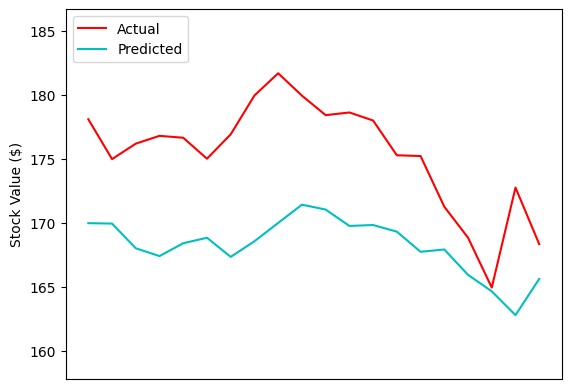

In [ ]:
fig, ax = plt.subplots()

ax.plot(actual_new[:,3], 'r-', label='Actual')
ax.plot(pred_new[:,3], 'c-', label='Predicted')

ax.set_ylabel('Stock Value ($)')

ax.set_ylim(min(min(actual_new[:,3]), min(pred_new[:,3])) - 5, max(max(actual_new[:,3]), max(pred_new[:,3])) + 5)
plt.xticks([])

ax.legend(loc='upper left')

plt.show()

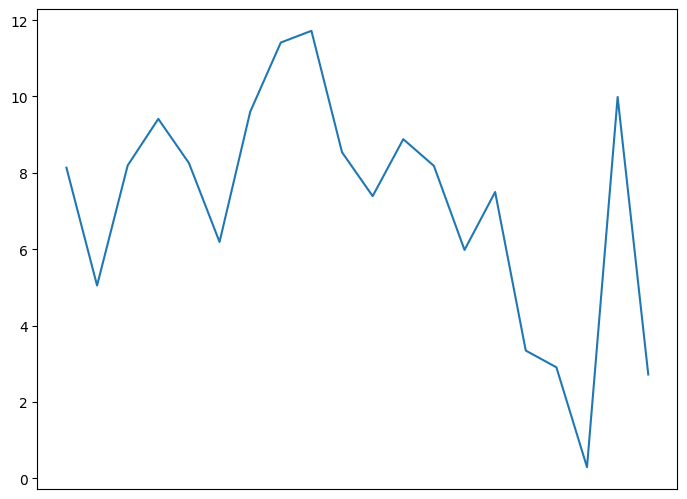

In [ ]:
differnce=actual_new-pred_new
fig=plt.figure()
diffGraph=fig.add_axes([0,0,1,1])
diffGraph.plot(differnce[:,3])
ax.set_ylabel('DFR actual - pred')
plt.xticks([])
plt.show()

# Gold Price prediction

In [ ]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/E92l5dmaQtjIeBdKEEtgUA/goldstock.csv')
df=df.sort_values(by='Date')
gold_price=df[['Close','Open','High','Low']]
gold_price=scaler.fit_transform(gold_price.values)
gold_price.shape

(2511, 4)

In [ ]:
train_window=7
gold_train,gold_test=create_in_out_sequence(gold_price,train_window)

length 2511
Size of data : 2504
size of test : 20
size of train : 2484


In [ ]:
epochs = 20
for i in tqdm(range(epochs)):
    epoch_loss = 0
    for seq, labels in tqdm(train):
        seq = torch.from_numpy(np.array(seq)).type(torch.FloatTensor)
        labels = torch.from_numpy(np.array(labels)).type(torch.FloatTensor)

        optimizer.zero_grad()

        y_pred = model(seq)

        labels = labels.view(1)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

        epoch_loss += single_loss.item()

    average_loss = epoch_loss / len(train)
    print(f'epoch: {i:3} loss: {average_loss:.10f}')

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/9367 [00:00<?, ?it/s]

epoch:   0 loss: 0.0006002024


  0%|          | 0/9367 [00:00<?, ?it/s]

epoch:   1 loss: 0.0005788175


  0%|          | 0/9367 [00:00<?, ?it/s]

epoch:   2 loss: 0.0005612835


  0%|          | 0/9367 [00:00<?, ?it/s]

epoch:   3 loss: 0.0005457675


  0%|          | 0/9367 [00:00<?, ?it/s]

epoch:   4 loss: 0.0005307756


  0%|          | 0/9367 [00:00<?, ?it/s]

epoch:   5 loss: 0.0005276874


  0%|          | 0/9367 [00:00<?, ?it/s]

epoch:   6 loss: 0.0005186019


  0%|          | 0/9367 [00:00<?, ?it/s]

epoch:   7 loss: 0.0005142361


  0%|          | 0/9367 [00:00<?, ?it/s]

epoch:   8 loss: 0.0005132152


  0%|          | 0/9367 [00:00<?, ?it/s]

epoch:   9 loss: 0.0005152312


  0%|          | 0/9367 [00:00<?, ?it/s]

epoch:  10 loss: 0.0005139145


  0%|          | 0/9367 [00:00<?, ?it/s]

epoch:  11 loss: 0.0005148494


  0%|          | 0/9367 [00:00<?, ?it/s]

epoch:  12 loss: 0.0005136823


  0%|          | 0/9367 [00:00<?, ?it/s]

epoch:  13 loss: 0.0005144848


  0%|          | 0/9367 [00:00<?, ?it/s]

epoch:  14 loss: 0.0005126800


  0%|          | 0/9367 [00:00<?, ?it/s]

epoch:  15 loss: 0.0005188373


  0%|          | 0/9367 [00:00<?, ?it/s]

epoch:  16 loss: 0.0005124797


  0%|          | 0/9367 [00:00<?, ?it/s]

epoch:  17 loss: 0.0005098648


  0%|          | 0/9367 [00:00<?, ?it/s]

epoch:  18 loss: 0.0005126516


  0%|          | 0/9367 [00:00<?, ?it/s]

epoch:  19 loss: 0.0005044582


In [ ]:
model.eval()
actual=[]
pred=[]
for seq,labels in test:
  seq=torch.from_numpy(np.array(seq)).type(torch.FloatTensor)
  labels=torch.from_numpy(np.array(labels)).type(torch.FloatTensor)
  actual.append(labels.item())
  with torch.no_grad():
    pred.append(model(seq).item())
actual=np.array(actual)
pred=np.array(pred)


In [ ]:
gold_pred=torch.from_numpy(np.array(pred )).type(torch.Tensor)
gold_actual=torch.from_numpy(np.array(actual)).type(torch.Tensor)
gold_pred_new = scaler.inverse_transform(np.c_[np.zeros(20),np.zeros(20),np.zeros(20),np.array(gold_pred)])
gold_actual_new = scaler.inverse_transform(np.c_[np.zeros(20),np.zeros(20),np.zeros(20),np.array(gold_actual)])
rsme=np.sqrt(mean_squared_error(gold_actual_new,gold_pred_new))
print("Root Mean Square Error:",rsme)

Root Mean Square Error: 4.024958508105604
